In [1]:
import networkx as nx

# Création du graphe
G = nx.DiGraph()  # Utilisez un graphe orienté pour représenter les relations

# Ajout des nœuds (entités)
G.add_node("Tom Hanks", type="acteur")
G.add_node("Forrest Gump", type="film")
G.add_node("Robert Zemeckis", type="réalisateur")
G.add_node("La Ligne verte", type="film")

# Ajout des relations (arêtes)
G.add_edge("Tom Hanks", "Forrest Gump", relation="a_joué_dans")
G.add_edge("Robert Zemeckis", "Forrest Gump", relation="a_réalisé")
G.add_edge("Tom Hanks", "La Ligne verte", relation="a_joué_dans")

In [2]:
for node in G.nodes(data=True):
    print(node)

('Tom Hanks', {'type': 'acteur'})
('Forrest Gump', {'type': 'film'})
('Robert Zemeckis', {'type': 'réalisateur'})
('La Ligne verte', {'type': 'film'})


In [3]:
for edge in G.edges(data=True):
    print(edge)

('Tom Hanks', 'Forrest Gump', {'relation': 'a_joué_dans'})
('Tom Hanks', 'La Ligne verte', {'relation': 'a_joué_dans'})
('Robert Zemeckis', 'Forrest Gump', {'relation': 'a_réalisé'})


In [4]:
# 1. Quels sont tous les films dans lesquels Tom Hanks a joué ?
films_tom_hanks = [
    voisin for voisin in G.neighbors("Tom Hanks")
    if G["Tom Hanks"][voisin]["relation"] == "a_joué_dans"
]
print("Films dans lesquels Tom Hanks a joué :", films_tom_hanks)

Films dans lesquels Tom Hanks a joué : ['Forrest Gump', 'La Ligne verte']


In [5]:
# 2. Qui sont les réalisateurs de chaque film dans lequel Tom Hanks a joué ?
realisateurs_par_film = {}
for film in films_tom_hanks:
    realisateurs = [
        voisin for voisin in G.predecessors(film)
        if G[voisin][film]["relation"] == "a_réalisé"
    ]
    realisateurs_par_film[film] = realisateurs

print("Réalisateurs de chaque film :", realisateurs_par_film)

Réalisateurs de chaque film : {'Forrest Gump': ['Robert Zemeckis'], 'La Ligne verte': []}


In [6]:
# Reprendre le graphe du TP1
G = nx.DiGraph()

# Ajout des nœuds avec attributs
G.add_node("Tom Hanks", type="acteur", nationalité="Américain")
G.add_node("Forrest Gump", type="film", date="1994")
G.add_node("Robert Zemeckis", type="réalisateur")
G.add_node("La Ligne verte", type="film", date="1999")
G.add_node("Philadelphia", type="film", date="1993")
G.add_node("Cast Away", type="film", date="2000")

# Ajout des relations
G.add_edge("Tom Hanks", "Forrest Gump", relation="a_joué_dans")
G.add_edge("Robert Zemeckis", "Forrest Gump", relation="a_réalisé")
G.add_edge("Tom Hanks", "La Ligne verte", relation="a_joué_dans")
G.add_edge("Tom Hanks", "Philadelphia", relation="a_joué_dans")
G.add_edge("Tom Hanks", "Cast Away", relation="a_joué_dans")

In [7]:
chemin = nx.shortest_path(G, source="Robert Zemeckis", target="Cast Away")
print("Chemin entre Robert Zemeckis et Cast Away :", chemin)

NetworkXNoPath: No path between Robert Zemeckis and Cast Away.

In [8]:
autres_acteurs = [
    acteur for acteur in G.nodes()
    if G.nodes[acteur].get("type") == "acteur" and acteur != "Tom Hanks"
]

liens_indirects = {}
for acteur in autres_acteurs:
    # Vérifie s'il existe un chemin entre Tom Hanks et l'autre acteur via des films
    if nx.has_path(G, "Tom Hanks", acteur):
        liens_indirects[acteur] = nx.shortest_path(G, "Tom Hanks", acteur)

print("Liens indirects entre Tom Hanks et les autres acteurs :", liens_indirects)

Liens indirects entre Tom Hanks et les autres acteurs : {}


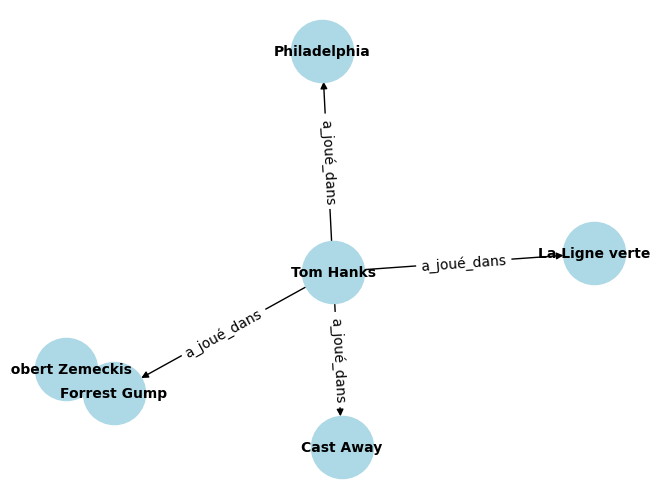

In [9]:
import matplotlib.pyplot as plt

# Dessinez le graphe avec les étiquettes
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

In [12]:
# 1. Quels sont tous les films dans lesquels Tom Hanks a joué après 1994 ?
films_apres_1994 = [
    film for film in G.neighbors("Tom Hanks")
    if G.nodes[film].get("type") == "film" and G.nodes[film].get("year") is not None and G.nodes[film]["year"] > 1994
]
print("Films dans lesquels Tom Hanks a joué après 1994 :", films_apres_1994)

Films dans lesquels Tom Hanks a joué après 1994 : []


In [13]:
realisateurs_par_film = {}
for film in G.neighbors("Tom Hanks"):
    if G.nodes[film].get("type") == "film":
        realisateurs = [
            voisin for voisin in G.predecessors(film)
            if G[voisin][film]["relation"] == "a_réalisé"
        ]
        realisateurs_par_film[film] = realisateurs

print("Réalisateur de chaque film de Tom Hanks :", realisateurs_par_film)

Réalisateur de chaque film de Tom Hanks : {'Forrest Gump': ['Robert Zemeckis'], 'La Ligne verte': [], 'Philadelphia': [], 'Cast Away': []}


In [14]:
import csv

# Données à écrire dans le fichier CSV
films = [
    {"Titre": "Forrest Gump", "Année": 1994, "Acteur": "Tom Hanks", "Réalisateur": "Robert Zemeckis"},
    {"Titre": "Philadelphia", "Année": 1993, "Acteur": "Tom Hanks", "Réalisateur": "Jonathan Demme"},
    {"Titre": "La Ligne verte", "Année": 1999, "Acteur": "Tom Hanks", "Réalisateur": "Frank Darabont"},
    {"Titre": "Cast Away", "Année": 2000, "Acteur": "Tom Hanks", "Réalisateur": "Robert Zemeckis"},
    {"Titre": "Inception", "Année": 2010, "Acteur": "Leonardo DiCaprio", "Réalisateur": "Christopher Nolan"},
]

# Création et écriture dans le fichier CSV
with open("films.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=["Titre", "Année", "Acteur", "Réalisateur"])
    writer.writeheader()  # Écrit l'en-tête
    writer.writerows(films)  # Écrit les lignes de données

print("Le fichier 'films.csv' a été créé avec succès.")

Le fichier 'films.csv' a été créé avec succès.


In [15]:
import pandas as pd
from rdflib import Graph, URIRef, Literal, Namespace

# Charger les données depuis le fichier CSV
df = pd.read_csv('films.csv')

# Créer un graphe RDF
g = Graph()
nsm = Namespace("http://example.org/")

# Ajouter les données au graphe RDF
for index, row in df.iterrows():
    film_uri = URIRef(nsm[row['Titre'].replace(" ", "_")])
    g.add((film_uri, nsm["titre"], Literal(row['Titre'])))
    g.add((film_uri, nsm["année"], Literal(row['Année'])))
    g.add((film_uri, nsm["acteur"], Literal(row['Acteur'])))
    g.add((film_uri, nsm["réalisateur"], Literal(row['Réalisateur'])))

In [16]:
query = """
PREFIX ns: <http://example.org/>
SELECT ?film WHERE {
    ?film ns:réalisateur "Robert Zemeckis" .
}
"""

results = g.query(query)

for row in results:
    print(f"Film: {row[0].split('/')[-1].replace('_', ' ')}")

Film: Forrest Gump
Film: Cast Away


In [20]:
query_films_tom_hanks = """
PREFIX ns: <http://example.org/>
SELECT ?film WHERE {
    ?film ns:acteur "Tom Hanks" .
}
"""

results_films_tom_hanks = g.query(query_films_tom_hanks)

print("Films joués par Tom Hanks :")

Films joués par Tom Hanks :


In [23]:
# 2. Trouvez l'année de sortie de tous les films
query_annee_sortie = """
PREFIX ns: <http://example.org/>  # Remplacez par le bon espace de noms
SELECT ?film ?annee WHERE {
    ?film ns:anneeDeSortie ?annee .  # Assurez-vous que ce prédicat existe dans votre graphe
}
"""

results_annee_sortie = g.query(query_annee_sortie)

# Vérifiez si des résultats sont trouvés
if not results_annee_sortie:
    print("Aucun résultat trouvé. Vérifiez l'espace de noms et les prédicats utilisés.")
else:
    print("Années de sortie des films :")
    for row in results_annee_sortie:
        film = row[0].split('/')[-1].replace('_', ' ')
        annee = row[1]
        print(f"Film: {film}, Année: {annee}")

Aucun résultat trouvé. Vérifiez l'espace de noms et les prédicats utilisés.


In [24]:
query_film_plus_ancien = """
PREFIX ns: <http://example.org/>  # Remplacez par le bon espace de noms
SELECT ?film ?annee
WHERE {
    ?film ns:anneeDeSortie ?annee .
}
ORDER BY ASC(?annee)  # Trie les résultats par année croissante
LIMIT 1  # Limite à un seul résultat
"""

results_film_plus_ancien = g.query(query_film_plus_ancien)

print("Le film le plus ancien dans le graphe :")
for row in results_film_plus_ancien:
    film = row[0].split('/')[-1].replace('_', ' ')
    annee = row[1]
    print(f"Film: {film}, Année: {annee}")

Le film le plus ancien dans le graphe :


In [25]:
query_realisateurs_tom_hanks = """
PREFIX ns: <http://example.org/>  # Remplacez par le bon espace de noms
SELECT DISTINCT ?realisateur
WHERE {
    ?film ns:acteur "Tom Hanks" .
    ?film ns:realisateur ?realisateur .
}
"""

results_realisateurs_tom_hanks = g.query(query_realisateurs_tom_hanks)

print("\nRéalisateurs qui ont travaillé avec Tom Hanks :")
for row in results_realisateurs_tom_hanks:
    realisateur = row[0].split('/')[-1].replace('_', ' ')
    print(f"Réalisateur: {realisateur}")


Réalisateurs qui ont travaillé avec Tom Hanks :
